In [69]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score
from sklearn import preprocessing

import torch
import cv2
import os
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import torch.nn.functional as F
from PIL import ImageFile
import matplotlib.pyplot as plt


import tensorflow as tf

import glob
from glob import glob


from google.colab import drive

In [70]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:

dataset='/content/gdrive/MyDrive/AUST/CSE 4.2/CSE 4238 Soft Computing Lab/Online/Assignment-1/imagery'
CLASS = [x.split("/")[-1] for x in glob(dataset_dir+'/*')]

In [72]:
dataset

'/content/gdrive/MyDrive/AUST/CSE 4.2/CSE 4238 Soft Computing Lab/Online/Assignment-1/imagery'

In [73]:
firmware = pd.read_csv('/content/gdrive/MyDrive/AUST/CSE 4.2/CSE 4238 Soft Computing Lab/Online/Assignment-1/firmware/firmware.csv')
firmware.drop('Unnamed: 1027', axis = 1, inplace = True)

firmware

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel985,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
3,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
4,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,...,204,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38883,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,68,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38884,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,68,34,0,0,0,0,0,0,0,0,0,0,0,...,68,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
38885,x86__64__lsb__unix-system-v__clang-3.9.0__O0__...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
trgt = firmware.groupby('class').count()[['target']]
trgt

,target
class,
benignware,38073
hackware,103
malware,711


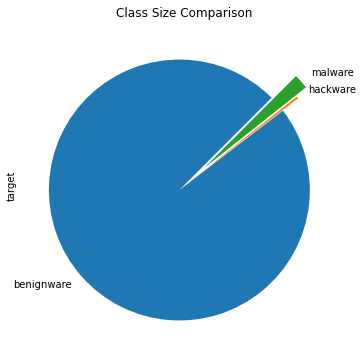

In [75]:
firmware.groupby('class').count().plot.pie(y = 'target', figsize = (6, 6), 
                                              explode = (.05, .1, .2), startangle = 45, 
                                              legend = False, title = 'Class Size Comparison')

In [78]:
train_images = []
def load_images(folder,label):
   
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        resized_img = cv2.resize(img, (48, 48))
        if img is not None:
            train_images.append([resized_img,label])
   
for classes in CLASS:
    folder=os.path.join(dataset,classes) 
    load_images(folder,classes)

In [79]:
x=[]
y=[]
for item in train_images:
    x.append(item[0])
    y.append(item[1])
x=np.array(x)
y=np.array(y)

In [80]:
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)
y=tf.keras.utils.to_categorical(y)

In [81]:
x_new=[]
for item in x:
  x_new.append(item.ravel())
x_new=np.array(x_new)   
x_new.shape[1]

6912

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

In [89]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

ann = tf.keras.models.Sequential()


ann.add(tf.keras.layers.Dense(units=100, activation='relu',input_shape=(6912,)))
ann.add(Dropout(0.6))

ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.5))

ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.5))

ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.4))

ann.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
ann.add(Dropout(0.4))

ann.add(tf.keras.layers.Dense(units=100, activation='softmax'))
ann.add(Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))




optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
ann.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])


hist=ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

# Predicting the Test set results
accuracy=ann.evaluate(X_test,y_test)[1]
print(accuracy)

Epoch 1/100
180/180 [==============================] - 3s 9ms/step - loss: 0.1600 - accuracy: 0.6614
Epoch 2/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1377 - accuracy: 0.6653
Epoch 3/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1307 - accuracy: 0.6653
Epoch 4/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1294 - accuracy: 0.6653
Epoch 5/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1278 - accuracy: 0.6653
Epoch 6/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1284 - accuracy: 0.6653
Epoch 7/100
180/180 [==============================] - 2s 10ms/step - loss: 0.1281 - accuracy: 0.6653
Epoch 8/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1280 - accuracy: 0.6653
Epoch 9/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1282 - accuracy: 0.6653
Epoch 10/100
180/180 [==============================] - 2s 9ms/step - loss: 0.1280 - accur

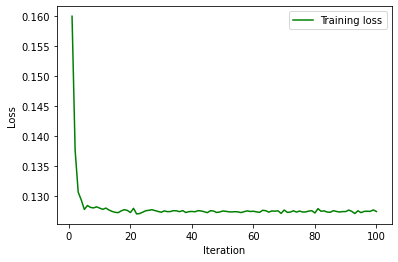

In [90]:
loss_train = hist.history['loss']
Iteration = range(1,101)
plt.plot(Iteration, loss_train, 'g', label='Training loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [100]:

cnn = tf.keras.models.Sequential()


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[48, 48, 3]))


cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=200, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(tf.keras.layers.Dense(units=200, activation='sigmoid'))
cnn.add(Dropout(0.2))


# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Part 3 - Training the CNN

# Compiling the CNN
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
cnn.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history=cnn.fit(X_train,y_train,
                  steps_per_epoch = 25,
                  epochs = 35)
# Predicting the Test set results
accuracy=cnn.evaluate(X_test,y_test)[1]
print(accuracy)

Epoch 1/35
25/25 [==============================] - 10s 367ms/step - loss: 0.9554 - accuracy: 0.1752
Epoch 2/35
25/25 [==============================] - 9s 359ms/step - loss: 0.6108 - accuracy: 0.4527
Epoch 3/35
25/25 [==============================] - 9s 357ms/step - loss: 0.5160 - accuracy: 0.6014
Epoch 4/35
25/25 [==============================] - 9s 358ms/step - loss: 0.4775 - accuracy: 0.6371
Epoch 5/35
25/25 [==============================] - 11s 424ms/step - loss: 0.4526 - accuracy: 0.6658
Epoch 6/35
25/25 [==============================] - 11s 425ms/step - loss: 0.4335 - accuracy: 0.6873
Epoch 7/35
25/25 [==============================] - 11s 429ms/step - loss: 0.4175 - accuracy: 0.7079
Epoch 8/35
25/25 [==============================] - 9s 358ms/step - loss: 0.4068 - accuracy: 0.7082
Epoch 9/35
25/25 [==============================] - 9s 357ms/step - loss: 0.3924 - accuracy: 0.7311
Epoch 10/35
25/25 [==============================] - 9s 359ms/step - loss: 0.3871 - accuracy: 0.

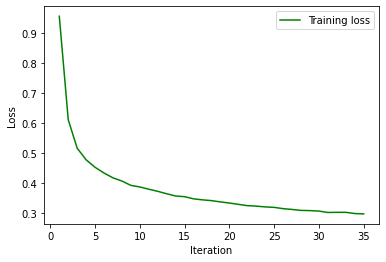

In [104]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
Iteration = range(1,36)
plt.plot(Iteration, loss_train, 'g', label='Training loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()